#### 1) Use “naïve_bayes_classification” dataset. Build a naïve bayes classification model to predict whether a person is diabetic based on glucose and bloodpressure attribute values.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
glucose =data.iloc[:,1].values
bp = data.iloc[:,2].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=data.iloc[:,::-1].values
y=data.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [8]:
from sklearn import preprocessing

In [9]:
le = preprocessing.LabelEncoder()
X=le.fit_transform(glucose)
X=X.reshape(-1,1)

In [10]:
y=le.fit_transform(bp)
y=y.reshape(-1,1)

In [11]:
from sklearn.naive_bayes import GaussianNB

In [13]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

In [14]:
from sklearn import metrics

In [15]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [16]:
test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        85

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

[[146   0]
 [  0  85]]


#### 2) Use iris dataset and create a classification model using Gaussian naïve bayes classifier.Compare the result of Naïve bayes Classifier with the Decision tree classifier.

In [2]:
import numpy as np

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
X = dataset.data 

In [5]:
y = dataset.target

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [10]:
from sklearn.naive_bayes import GaussianNB

In [12]:
model = GaussianNB()

In [13]:
model.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
print(accuracy_score(y_test, y_pred))

0.95


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = clf.predict(X_test)
result = accuracy_score(y_test,y_pred)

In [20]:
result

0.9666666666666667

#### 3) Use breast cancer dataset and apply Gaussian naïve bayes to create a classification modelfor predicting whether a person suffers from cancer or not. Check the accuracy of your model.


In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [60]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [61]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [62]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [63]:
breast_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [64]:
breast_cancer.target_names


array(['malignant', 'benign'], dtype='<U9')

In [65]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [66]:
df = pd.DataFrame(
    np.c_[breast_cancer.data, breast_cancer.target],
    columns = [list(breast_cancer.feature_names)+ ['target']]
                 )

In [67]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [68]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [69]:
df.shape

(569, 31)

In [70]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [72]:
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [73]:
X.shape, y.shape

((569, 30), (569,))

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 999)

In [76]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((455, 30), (455,), (114, 30), (114,))

In [77]:
clf = GaussianNB()

In [78]:
clf.fit(X_train, y_train)

GaussianNB()

In [79]:
clf.score(X_val, y_val)

0.9210526315789473

In [80]:
clf_mn = MultinomialNB()

In [81]:
clf_mn.fit(X_train, y_train)

MultinomialNB()

In [82]:
clf_mn.score(X_val, y_val)

0.8421052631578947

In [83]:
clf_b = BernoulliNB()
clf_b.fit(X_train, y_train)
clf_b.score(X_val, y_val)

0.5526315789473685

In [84]:
pd.set_option('display.max_columns', None)

In [85]:
df[99:100]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
99,14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.004452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353,0.0


In [89]:
patient1 = [14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.004452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353]
patient1

[14.42,
 19.77,
 94.48,
 642.5,
 0.09752,
 0.1141,
 0.09388,
 0.05839,
 0.1879,
 0.0639,
 0.2895,
 1.851,
 2.376,
 26.85,
 0.008005,
 0.02895,
 0.03321,
 0.01424,
 0.01462,
 0.004452,
 16.33,
 30.86,
 109.5,
 826.4,
 0.1431,
 0.3026,
 0.3194,
 0.1565,
 0.2718,
 0.09353]

In [90]:
patient1 = np.array([patient1])

In [91]:
clf.predict(patient1)

array([1.])

In [92]:
pred = clf.predict(patient1)

if pred[0] == 0:
    print("Patient is suffering from Cancer (Maligant Tumor)")
else:
    print("Patient has no Cancer (Benign)")

Patient has no Cancer (Benign)


#### 4) Use titanic dataset. Use the attributes: Class of the room, Sex, Age, number ofsiblings/spouses, number of parents/children, passenger fare and port of embarkation information. Compare the result of Naïve bayes Classifier with the Decision tree classifier.

In [59]:
data = pd.read_csv('titanic.csv')

In [60]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [61]:
a = data.drop(columns=['deck'])

In [62]:
a

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [68]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [69]:
feature_cols = ['embarked', 'pclass', 'age','sibsp','parch','fare'] 
X = a[feature_cols].values 
y = a.survived 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [74]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [76]:
print('gnbr: {}'.format(gnb.score(X_test, y_test)))

gnbr: 0.6591928251121076


In [77]:
print('dtc: {}'.format(dtc.score(X_test, y_test)))

dtc: 0.6367713004484304


### 5) Use the given dataset, which consists of weather, temp and play as attributes. Perform the following task:
### i. Apply data pre-processing and convert categorical values into numeric values.
### ii. Use the list “weather”, “temp” as features and “play” as target. Try to create a model using
### Naïve bayes classifier to predict whether a person plays the game depending upon the values of
### weather and temperature

In [103]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']


In [104]:
from sklearn import preprocessing

In [106]:
le = preprocessing.LabelEncoder()

In [107]:
weather_encoded = le.fit_transform(weather)

In [108]:
weather_encoded

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1], dtype=int64)

In [109]:
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)
print ("Temp:",temp_encoded)
print ("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [110]:
features = list(zip(weather_encoded,temp_encoded))

In [111]:
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
model = GaussianNB()

In [114]:
model.fit(features,label)

GaussianNB()

In [116]:
predicted = model.predict([[0,2]])

In [117]:
print("Predicated Value:",predicted)

Predicated Value: [1]


### 6) Consider the following problem:
### in AB Company, there is a salary distribution table based on Year of Experience as given in
### “salary_dataset.csv”. “The scenario is you are a HR officer; you got a candidate with 5 years
### of experience. Then what is the best salary you should offer to him?” 

In [118]:
import pandas as pd
import numpy as np

In [119]:
salary = pd.read_csv('Salary_Data.csv')

In [120]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [121]:
x = salary.iloc[:, :-1].values
y = salary.iloc[:, 1].values

In [122]:

from sklearn.model_selection import train_test_split 

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [126]:
y_pred = regressor.predict(x_test)
x_pred = regressor.predict(x_train)

In [128]:
import matplotlib.pyplot as plt

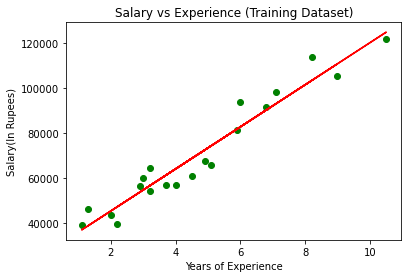

Train Score:  0.9381900012894278


In [129]:
plt.scatter(x_train, y_train, color="green")
plt.plot(x_train, x_pred, color="red")
plt.title("Salary vs Experience (Training Dataset)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary(In Rupees)")
plt.show()
print('Train Score: ', regressor.score(x_train, y_train))


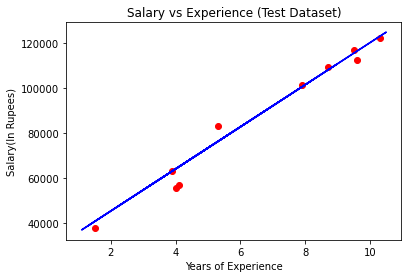

Test Score:  0.9749154407708353


In [130]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, x_pred, color="blue")
plt.title("Salary vs Experience (Test Dataset)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary(In Rupees)")
plt.show()
print('Test Score: ', regressor.score(x_test, y_test))
